In [1]:
import os
import sys
import ast
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.all_metrics_generate import generate_metrics
from scripts.all_metrics_generate import plot_roc_ensemble_patient_level, plot_roc_ensemble_image_level, plot_roc_ensemble_tile_level



## Funcoes uteis


In [2]:
# 1. Converter strings para dicionários se necessário
def safe_convert_to_dict(value):
    if isinstance(value, dict):
        return value
    try:
        return ast.literal_eval(value)
    except:
        return {}

In [3]:
classes = ['cin', 'ebv', 'gs', 'msi']     # MobileNet
# classes = ['cin', 'ebv', 'msi', 'gs']   # EffNet
# classes = ['cin', 'ebv', 'gs', 'msi']   # GoogleNet
# classes = ['cin', 'ebv', 'gs', 'msi']   # ShuffleNet

ENSEMBLE_METHOD = 'soft_voting' # Opções: 'weighted', 'hard_voting', 'soft_voting'
WEIGHT_METRIC = ''  # Métrica para ponderação, se aplicável

analise_type = 'tile'  # Pode ser 'patient', 'tile' ou 'image'
network_name = 'EffNet'  # Pode ser 'MobileNet', 'EffNet', 'ShuffleNet'
network = network_name  # Define the network type, e.g., "GGNet", "MobileNet", "GoogleNet", "ShuffleNet"



### Por Tile

In [6]:
path_tile = fr"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\{network}\Ensemble_{analise_type}_level_{ENSEMBLE_METHOD}\ensemble_per_{analise_type}_{ENSEMBLE_METHOD}.csv"
df_tile = pd.read_csv(path_tile)

In [7]:
df_tile

,patient_id,tile_name,true_label,true_label_one_hot,voto_majoritario_simples,distribuicao_votos_simples,predicted_label_ensemble,predicted_probability_ensemble,mean_probs_per_class_tile,std_probs_per_class,predicted_probability_mean_winner,predicted_probability_std_winner,mean_probability_std_dev_original
0,TCGA-3M-AB47-01Z-00-DX1,10_34.jpeg,gs,"[0, 0, 1, 0]",cin,"{'cin': 9, 'msi': 1}",cin,0.618485,"{'cin': 0.6184847393895756, 'ebv': 0.053382135...","{'cin': 0.17091090193431197, 'ebv': 0.03528939...",0.618485,0.170911,0.255173
1,TCGA-3M-AB47-01Z-00-DX1,10_35.jpeg,gs,"[0, 0, 1, 0]",cin,"{'msi': 2, 'cin': 8}",cin,0.580562,"{'cin': 0.5805616112322247, 'ebv': 0.048670973...","{'cin': 0.1996940171862943, 'ebv': 0.043725965...",0.580562,0.199694,0.256915
2,TCGA-3M-AB47-01Z-00-DX1,10_36.jpeg,gs,"[0, 0, 1, 0]",cin,"{'cin': 8, 'msi': 2}",cin,0.604938,"{'cin': 0.6049379012419752, 'ebv': 0.051088978...","{'cin': 0.2163782717834672, 'ebv': 0.053602116...",0.604938,0.216378,0.265755
3,TCGA-3M-AB47-01Z-00-DX1,10_37.jpeg,gs,"[0, 0, 1, 0]",cin,"{'cin': 9, 'msi': 1}",cin,0.747270,"{'cin': 0.7472698907956319, 'ebv': 0.040321612...","{'cin': 0.143000441957359, 'ebv': 0.0498177839...",0.747270,0.143000,0.300291
4,TCGA-3M-AB47-01Z-00-DX1,10_38.jpeg,gs,"[0, 0, 1, 0]",cin,{'cin': 10},cin,0.808719,"{'cin': 0.8087185231113867, 'ebv': 0.036462187...","{'cin': 0.06426552808465827, 'ebv': 0.03117512...",0.808719,0.064266,0.325403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179947,TCGA-VQ-AA69-01A-01-TS1,9_24.jpeg,ebv,"[0, 1, 0, 0]",msi,"{'msi': 5, 'ebv': 3, 'cin': 2}",ebv,0.350716,"{'cin': 0.3012269877301227, 'ebv': 0.350716492...","{'cin': 0.2269401729531376, 'ebv': 0.342490212...",0.350716,0.342490,0.265832
179948,TCGA-VQ-AA69-01A-01-TS1,9_25.jpeg,ebv,"[0, 1, 0, 0]",msi,"{'msi': 4, 'ebv': 3, 'cin': 3}",msi,0.407736,"{'cin': 0.3325066749332507, 'ebv': 0.219577804...","{'cin': 0.24790823887075636, 'ebv': 0.29471398...",0.407736,0.275831,0.268353
179949,TCGA-VQ-AA69-01A-01-TS1,9_26.jpeg,ebv,"[0, 1, 0, 0]",cin,"{'cin': 5, 'ebv': 3, 'msi': 2}",cin,0.412632,"{'cin': 0.4126323789713691, 'ebv': 0.278608358...","{'cin': 0.26588190536401685, 'ebv': 0.32817323...",0.412632,0.265882,0.266548
179950,TCGA-VQ-AA69-01A-01-TS1,9_27.jpeg,ebv,"[0, 1, 0, 0]",msi,"{'msi': 5, 'ebv': 3, 'cin': 2}",msi,0.430989,"{'cin': 0.27198543970879413, 'ebv': 0.26457529...","{'cin': 0.2655266532760883, 'ebv': 0.342078318...",0.430989,0.337045,0.301160


In [8]:
tile_level_df = df_tile.copy()

In [9]:
# Transformando cada dicionário da coluna em uma lista
tile_level_df[f'mean_probs_per_class_{analise_type}'] = tile_level_df[f'mean_probs_per_class_{analise_type}'].apply(safe_convert_to_dict)

In [10]:

# Transformando cada dicionário da coluna em uma lista
tile_df = tile_level_df[f'mean_probs_per_class_{analise_type}'].apply(lambda d: list(d.values())).tolist()
tile_df = np.array(tile_df)
# tile_df

In [11]:
# 2. Preparar os dados
n_classes = len(classes)

# Binarizar as labels verdadeiras
y_true = tile_level_df['true_label']
label_binarizer_tile = label_binarize(y_true, classes=classes)


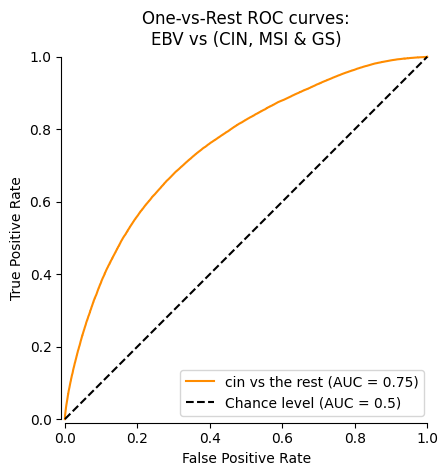

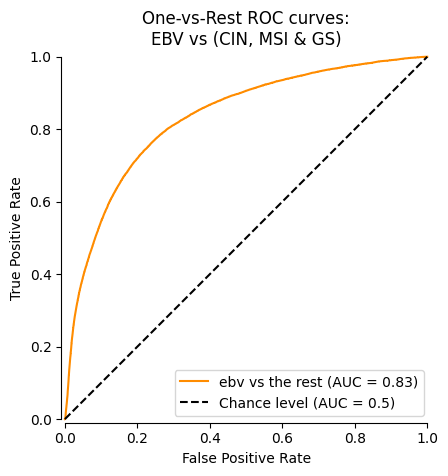

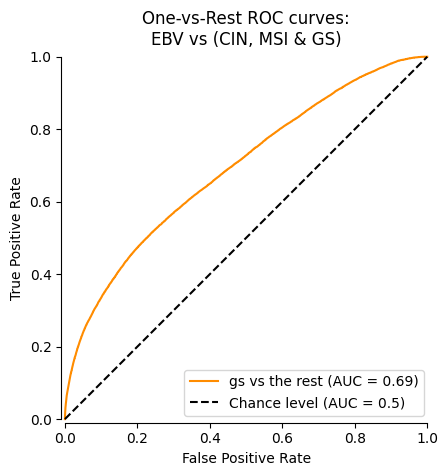

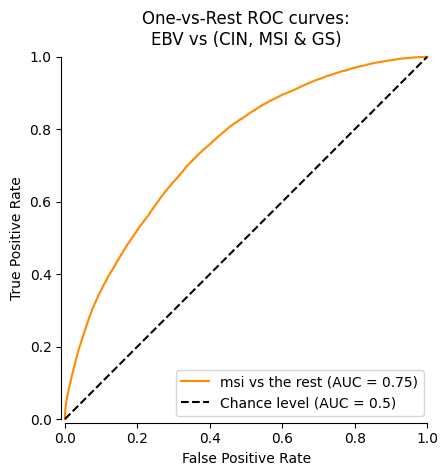

In [12]:
from sklearn.metrics import RocCurveDisplay

for intesse_class  in classes:
    class_id = classes.index(intesse_class)
    # print(f"Class {intesse_class} (ID: {class_id})")
    import matplotlib.pyplot as plt


    display = RocCurveDisplay.from_predictions(
        label_binarizer_tile[:, class_id],
        tile_df[:, class_id],
        name=f"{intesse_class} vs the rest",
        curve_kwargs=dict(color="darkorange"),
        plot_chance_level=True,
        despine=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="One-vs-Rest ROC curves:\nEBV vs (CIN, MSI & GS)",
    )



In [13]:
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(label_binarizer_tile.ravel(), tile_df.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.81


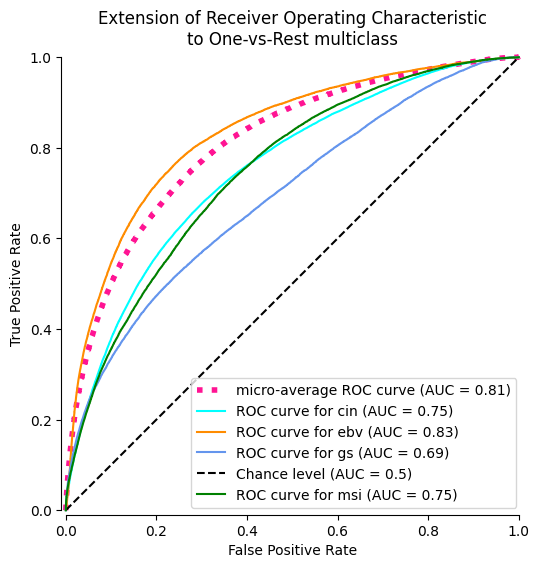

In [14]:
import numpy as np
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

n_classes = len(np.unique(classes))

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue", "green", "red", "purple"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        label_binarizer_tile[:, class_id],
        tile_df[:, class_id],
        name=f"ROC curve for {np.array(classes)[class_id]}",
        curve_kwargs=dict(color=color),
        ax=ax,
        plot_chance_level=(class_id == 2),
        despine=True,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

In [15]:
generate_metrics(ENSEMBLE_METHOD, path_tile, analise_type=analise_type, network=network_name)

[✔] Métricas e gráficos salvos em: roc_curves\EffNet\soft_voting\tile


### Por imagem 

In [16]:
path_image = fr"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\{network}\Ensemble_image_level_{ENSEMBLE_METHOD}\ensemble_per_image_{ENSEMBLE_METHOD}.csv"

df_image = pd.read_csv(path_image)

In [17]:
df_image

,patient_id,true_label,true_label_one_hot,voto_majoritario_simples_tiles,distribuicao_votos_simples_tiles,predicted_label_ensemble_image,predicted_probability_ensemble_image,mean_probs_per_class_image,std_probs_per_class_image,predicted_probability_mean_winner_image,predicted_probability_std_winner_image,mean_probability_std_dev_original_tiles
0,TCGA-3M-AB47-01Z-00-DX1,gs,"[0, 0, 1, 0]",cin,"{'cin': 27925, 'msi': 4705, 'gs': 1014, 'ebv':...",cin,0.617357,"{'cin': 0.6173574561943115, 'ebv': 0.112693345...","{'cin': 0.2372664479785857, 'ebv': 0.159195502...",0.617357,0.237266,0.271463
1,TCGA-B7-A5TN-01A-02-TSB,cin,"[1, 0, 0, 0]",cin,"{'cin': 5660, 'msi': 705, 'gs': 143, 'ebv': 102}",cin,0.702909,"{'cin': 0.7029089090964187, 'ebv': 0.058680345...","{'cin': 0.2269434584529415, 'ebv': 0.089442210...",0.702909,0.226943,0.297418
2,TCGA-BR-4253-01A-01-TS1,ebv,"[0, 1, 0, 0]",msi,"{'ebv': 14161, 'msi': 21346, 'cin': 5275, 'gs'...",msi,0.478165,"{'cin': 0.16480464601461825, 'ebv': 0.32605547...","{'cin': 0.19946126857646485, 'ebv': 0.33907039...",0.478165,0.339455,0.298180
3,TCGA-BR-4253-11A-01-TS1,ebv,"[0, 1, 0, 0]",msi,"{'cin': 7335, 'msi': 9271, 'ebv': 1593, 'gs': ...",msi,0.445029,"{'cin': 0.3419251297840589, 'ebv': 0.118199599...","{'cin': 0.23750123381251492, 'ebv': 0.17353238...",0.445029,0.296149,0.252667
4,TCGA-BR-4279-11A-01-BS1,cin,"[1, 0, 0, 0]",cin,"{'msi': 3213, 'cin': 16995, 'ebv': 471, 'gs': ...",cin,0.640166,"{'cin': 0.6401659019199396, 'ebv': 0.061322058...","{'cin': 0.235869094312659, 'ebv': 0.1038429128...",0.640166,0.235869,0.286448
...,...,...,...,...,...,...,...,...,...,...,...,...
91,TCGA-VQ-A8PX-01A-01-TS1,msi,"[0, 0, 0, 1]",cin,"{'cin': 2225, 'msi': 906, 'ebv': 263, 'gs': 16}",cin,0.535953,"{'cin': 0.5359531123295649, 'ebv': 0.103874533...","{'cin': 0.2519447649820495, 'ebv': 0.173596190...",0.535953,0.251945,0.267598
92,TCGA-VQ-A91W-01A-01-TS1,ebv,"[0, 1, 0, 0]",cin,"{'cin': 1076, 'msi': 352, 'ebv': 218, 'gs': 24}",cin,0.523923,"{'cin': 0.5239233759276787, 'ebv': 0.145519953...","{'cin': 0.26540394678989215, 'ebv': 0.21167146...",0.523923,0.265404,0.261876
93,TCGA-VQ-A923-01Z-00-DX1,ebv,"[0, 1, 0, 0]",ebv,"{'cin': 7663, 'gs': 7376, 'ebv': 20535, 'msi':...",ebv,0.409142,"{'cin': 0.19512188627838375, 'ebv': 0.40914154...","{'cin': 0.22788920494165565, 'ebv': 0.33752350...",0.409142,0.337524,0.268791
94,TCGA-VQ-A928-01A-01-TS1,gs,"[0, 0, 1, 0]",cin,"{'cin': 4263, 'gs': 187, 'ebv': 336, 'msi': 884}",cin,0.608865,"{'cin': 0.6088654987365527, 'ebv': 0.093831334...","{'cin': 0.25394549204237554, 'ebv': 0.14886742...",0.608865,0.253945,0.271048


In [18]:
generate_metrics(ENSEMBLE_METHOD, path_image, analise_type='image', network=network_name)

[✔] Métricas e gráficos salvos em: roc_curves\EffNet\soft_voting\image


### Por paciente

In [19]:
path_pacient = fr"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\{network}\Ensemble_patient_level_{ENSEMBLE_METHOD}\ensemble_per_patient_{ENSEMBLE_METHOD}.csv"

patient_df = pd.read_csv(path_pacient)

In [20]:
patient_df


,patient_id,true_label,voto_majoritario_simples_paciente,distribuicao_votos_simples_paciente,predicted_label_ensemble_paciente,predicted_probability_ensemble_paciente,mean_probs_per_class_paciente,std_probs_per_class_paciente,predicted_probability_mean_winner_paciente,predicted_probability_std_winner_paciente,mean_probability_std_dev_original_tiles
0,TCGA-3M-AB47,gs,cin,"{'cin': 27925, 'msi': 4705, 'gs': 1014, 'ebv':...",cin,0.617357,"{'cin': 0.6173574561943115, 'ebv': 0.112693345...","{'cin': 0.2372664479785857, 'ebv': 0.159195502...",0.617357,0.237266,0.271463
1,TCGA-B7-A5TN,cin,cin,"{'cin': 5660, 'msi': 705, 'gs': 143, 'ebv': 102}",cin,0.702909,"{'cin': 0.7029089090964187, 'ebv': 0.058680345...","{'cin': 0.2269434584529415, 'ebv': 0.089442210...",0.702909,0.226943,0.297418
2,TCGA-BR-4253,ebv,msi,"{'ebv': 15754, 'msi': 30617, 'cin': 12610, 'gs...",msi,0.467611,"{'cin': 0.22121858917045734, 'ebv': 0.25985212...","{'cin': 0.22779055582372024, 'ebv': 0.31196105...",0.467611,0.326651,0.283684
3,TCGA-BR-4279,cin,cin,"{'msi': 3213, 'cin': 16995, 'ebv': 471, 'gs': ...",cin,0.640166,"{'cin': 0.6401659019199396, 'ebv': 0.061322058...","{'cin': 0.235869094312659, 'ebv': 0.1038429128...",0.640166,0.235869,0.286448
4,TCGA-BR-4357,cin,cin,"{'msi': 16517, 'cin': 17459, 'ebv': 2401, 'gs'...",cin,0.427689,"{'cin': 0.42768855466998407, 'ebv': 0.09621932...","{'cin': 0.30499391036822, 'ebv': 0.15724939033...",0.427689,0.304994,0.284070
...,...,...,...,...,...,...,...,...,...,...,...
77,TCGA-VQ-A8PX,msi,cin,"{'cin': 2225, 'msi': 906, 'ebv': 263, 'gs': 16}",cin,0.535953,"{'cin': 0.5359531123295649, 'ebv': 0.103874533...","{'cin': 0.2519447649820495, 'ebv': 0.173596190...",0.535953,0.251945,0.267598
78,TCGA-VQ-A91W,ebv,cin,"{'cin': 1076, 'msi': 352, 'ebv': 218, 'gs': 24}",cin,0.523923,"{'cin': 0.5239233759276787, 'ebv': 0.145519953...","{'cin': 0.26540394678989215, 'ebv': 0.21167146...",0.523923,0.265404,0.261876
79,TCGA-VQ-A923,ebv,ebv,"{'cin': 7663, 'gs': 7376, 'ebv': 20535, 'msi':...",ebv,0.409142,"{'cin': 0.19512188627838375, 'ebv': 0.40914154...","{'cin': 0.22788920494165565, 'ebv': 0.33752350...",0.409142,0.337524,0.268791
80,TCGA-VQ-A928,gs,cin,"{'cin': 4263, 'gs': 187, 'ebv': 336, 'msi': 884}",cin,0.608865,"{'cin': 0.6088654987365527, 'ebv': 0.093831334...","{'cin': 0.25394549204237554, 'ebv': 0.14886742...",0.608865,0.253945,0.271048


In [21]:
generate_metrics(ENSEMBLE_METHOD, path_pacient, analise_type='paciente', network=network_name)

[✔] Métricas e gráficos salvos em: roc_curves\EffNet\soft_voting\paciente


## Ensamble Entre Modelos

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Extrair os rótulos verdadeiros e as previsões do ensemble
# y_true_ensemble = df['true_label']
# y_pred_ensemble = df['voto_majoritario']

# # Obter a lista de todas as classes possíveis
# class_labels = sorted(y_true_ensemble.unique())

# # Gerar a matriz de confusão
# cm = confusion_matrix(y_true_ensemble, y_pred_ensemble, labels=class_labels)

# # Plotar a matriz de confusão
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# fig, ax = plt.subplots(figsize=(10, 8))
# disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
# ax.set_title('Matriz de Confusão - Ensemble por Voto Majoritário')
# plt.tight_layout()
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.preprocessing import label_binarize
# from itertools import cycle
# import pandas as pd
# import ast # <-- 1. Importe a biblioteca AST


# y_true_ensemble = df['true_label']

# # 2. Converta a coluna de string para dicionário 
# # Usamos .loc para garantir que a modificação seja feita no DataFrame original
# df.loc[:, 'mean_probs_per_class_dict'] = df['mean_probs_per_class'].apply(ast.literal_eval)

# # 3. Binarize os rótulos verdadeiros
# y_true_bin = label_binarize(y_true_ensemble, classes=class_labels)
# n_classes = y_true_bin.shape[1]

# # 4. Crie a matriz de probabilidade a partir da coluna de dicionários (a nova, corrigida)
# prob_matrix = df['mean_probs_per_class_dict'].apply(
#     lambda d: pd.Series([d.get(c, 0) for c in class_labels])
# ).values

# # 5. Calcule a curva ROC e a área sob a curva (AUC) para cada classe
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], prob_matrix[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # 6. Plotar todas as curvas ROC
# plt.figure(figsize=(12, 9))
# colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=2,
#              label=f'Curva ROC da classe {class_labels[i]} (AUC = {roc_auc[i]:0.2f})')

# plt.plot([0, 1], [0, 1], 'k--', lw=2) # Linha de referência
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Taxa de Falsos Positivos (FPR)')
# plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
# plt.title('Curva ROC Multi-classe (One-vs-Rest) - Ensemble')
# plt.legend(loc="lower right")
# plt.grid(True)
# plt.show()

In [ ]:
# # filtrar paciente TCGA-3M-AB46 e ver sua label na coluna "Subtype"
# # patient_df = df4[df4['Patient ID'] == 'TCGA-3M-AB47-01A']
# patient_label = patient_df['Subtype'].values[0] if not patient_df.empty else None

In [ ]:
# import matplotlib.pyplot as plt

# from sklearn.metrics import RocCurveDisplay

# display = RocCurveDisplay.from_predictions(
#     npy_labels[:, classes.index("gs")],
#     npy_preds[:, classes.index("gs")],
#     name=f"{intesse_class} vs the rest",
#     curve_kwargs=dict(color="darkorange"),
#     plot_chance_level=True,
#     despine=True,
# )
# _ = display.ax_.set(
#     xlabel="False Positive Rate",
#     ylabel="True Positive Rate",
#     title="One-vs-Rest ROC curves:\nEBV vs (CIN, MSI & GS)",
# )


In [ ]:
# import numpy as np
# from itertools import cycle
# from sklearn.metrics import RocCurveDisplay

# n_classes = len(np.unique(classes))

# fig, ax = plt.subplots(figsize=(6, 6))

# plt.plot(
#     fpr["micro"],
#     tpr["micro"],
#     label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
#     color="deeppink",
#     linestyle=":",
#     linewidth=4,
# )


# colors = cycle(["aqua", "darkorange", "cornflowerblue", "green", "red", "purple"])
# for class_id, color in zip(range(n_classes), colors):
#     RocCurveDisplay.from_predictions(
#         label_binarizer2[:, class_id],
#         pacinte_df[:, class_id],
#         name=f"ROC curve for {np.array(classes)[class_id]}",
#         curve_kwargs=dict(color=color),
#         ax=ax,
#         plot_chance_level=(class_id == 2),
#         despine=True,
#     )

# _ = ax.set(
#     xlabel="False Positive Rate",
#     ylabel="True Positive Rate",
#     title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
# )

In [ ]:
# import os
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import RocCurveDisplay, roc_curve, auc
# import matplotlib.pyplot as plt
# from collections import Counter
# from itertools import cycle
# import ast

# # Função auxiliar para converter strings de dicionário em dicionários reais
# def safe_convert_to_dict(value):
#     if isinstance(value, dict):
#         return value
#     try:
#         return ast.literal_eval(value)
#     except:
#         return {}
    

# # Gerar métricas por paciente a partir do DataFrame fornecido.
# def generate_metrics(path_data, analise_type='tile', classes=['cin', 'ebv', 'msi', 'gs'], network='ensemble'):
#     """
#     Gera métricas por paciente a partir do DataFrame fornecido.
    
#     Parâmetros:
#     df (DataFrame): DataFrame contendo as colunas 'true_label' e 'mean_probs_per_class_{ana}'.
    
#     Retorna:
#     DataFrame: DataFrame com as métricas por paciente.
#     """
    
#     # Ler o DataFrame
#     df = pd.read_csv(path_data)

#     # Converter a coluna de strings para dicionários
#     df[f'mean_probs_per_class_{analise_type}'] = df[f'mean_probs_per_class_{analise_type}'].apply(safe_convert_to_dict)

#     # Transformando cada dicionário da coluna em uma lista
#     paciente_df = df[f'mean_probs_per_class_{analise_type}'].apply(lambda d: list(d.values())).tolist()
#     paciente_df = np.array(paciente_df)
#     # paciente_df

#     # Definir quantas classes existem
#     n_classes = len(classes)


#     # Extrair os rótulos verdadeiros e as previsões do ensemble
#     y_true = df['true_label']
    
#     # Binarizar os rótulos verdadeiros
#     label_binarizer = label_binarize(y_true, classes=classes)

#     # Converter a coluna de dicionários para uma matriz de probabilidades
#     # prob_matrix = df['mean_probs_per_class_{ana}'].apply(lambda d: pd.Series(d)).values
    
#     # Obter classe de interesse
#     for intesse_class  in classes:
#         class_id = classes.index(intesse_class)
#         # print(f"Class {intesse_class} (ID: {class_id})")

#         display = RocCurveDisplay.from_predictions(
#             label_binarizer[:, class_id],
#             paciente_df[:, class_id],
#             name=f"{intesse_class} vs the rest",
#             curve_kwargs=dict(color="darkorange"),
#             plot_chance_level=True,
#             despine=True,
#         )

#         outras_classes = [c for c in classes if c != intesse_class]
#         print(f"Classe atual: {intesse_class}")
#         print(f"Outras classes: {outras_classes}")
#         print("-" * 30)

#         # Fechar a figura após cada iteração para evitar exibição
#         plt.close()
        
#         _ = display.ax_.set(
#             xlabel="False Positive Rate",
#             ylabel="True Positive Rate",
#             title=f"One Vs Rest ROC curve per patient\n {intesse_class} vs ({', '.join(outras_classes)})",
#         )
#         # criar diretório de saída se não existir
#         save_output = f"roc_curves/{network}"
#         if not os.path.exists(save_output):
#             os.makedirs(save_output)

#         # Salvar a curva ROC para cada classe
#         output_path = f"roc_curve_{intesse_class}_{network}.png"
#         display.figure_.savefig(os.path.join(save_output, output_path))
#         print(f"Curva ROC para {intesse_class} salva em: {output_path}")   

#         # store the fpr, tpr, and roc_auc for all averaging strategies
#         fpr, tpr, roc_auc = dict(), dict(), dict()

#         # Compute micro-average ROC curve and ROC area
#         fpr["micro"], tpr["micro"], _ = roc_curve(label_binarizer.ravel(), paciente_df.ravel())
#         roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#         # print(f"Micro-averaged One-vs-Rest ROC AUC score for {intesse_class}:\n{roc_auc['micro']:.2f}")  

#        # Gerar roc de todas as classes
#         fig, ax = plt.subplots(figsize=(6, 6))

#         plt.plot(
#             fpr["micro"],
#             tpr["micro"],
#             label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
#             color="deeppink",
#             linestyle=":",
#             linewidth=4,
#         )

#         colors = cycle(["aqua", "darkorange", "cornflowerblue", "green", "red", "purple"])
#         for class_id, color in zip(range(n_classes), colors):
#             RocCurveDisplay.from_predictions(
#                 label_binarizer[:, class_id],
#                 paciente_df[:, class_id],
#                 name=f"ROC curve for {np.array(classes)[class_id]}",
#                 curve_kwargs=dict(color=color),
#                 ax=ax,
#                 plot_chance_level=(class_id == 2),
#                 despine=True,
#             )

#         _ = ax.set(
#             xlabel="False Positive Rate",
#             ylabel="True Positive Rate",
#             title="ROC curve per patient \nto One-vs-Rest multiclass",
#         )

#         # Salvar a curva ROC para todas as classes
#         output_path_all = f"roc_curve_all_classes_{network}.png"
#         fig.savefig(os.path.join(save_output, output_path_all))
#         print(f"Curva ROC para todas as classes salva em: {output_path_all}")

#         # Fechar a figura para evitar que seja exibida
#         plt.close(fig)


In [ ]:
path_ensamble = r'C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\Ensemble_Between_Models\TileLevel_Ensemble_Models_hard_voting\ensemble_between_models_per_tile_hard_voting.csv'

ensable_df = pd.read_csv(path_ensamble)
ensable_df

In [ ]:
# carregar o DataFrame final do ensemble
output_path = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\Ensemble_Between_Models\PatientLevel_Ensemble_soft_voting\ensemble_between_models_per_patient_soft_voting.csv"
final_ensemble_patient_df = pd.read_csv(output_path)

In [ ]:
final_ensemble_patient_df

In [ ]:
base_path = r'C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\Ensemble_Between_Models'
plot_roc_ensemble_patient_level(ENSEMBLE_METHOD=ENSEMBLE_METHOD,base_path=base_path, ensemble_type='patient', network='ensamble_models')


In [ ]:
plot_roc_ensemble_image_level(ENSEMBLE_METHOD=ENSEMBLE_METHOD, base_path=base_path, ensemble_type='image', network='ensamble_models')


In [ ]:
plot_roc_ensemble_tile_level(ENSEMBLE_METHOD=ENSEMBLE_METHOD, base_path=base_path, ensemble_type='tile', network='ensamble_models')

In [ ]:
# carregar o DataFrame final do ensemble
merge_output_path = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\merged_table_30folds_mob_gg_sh_hard_soft_ensemble.csv"

merged_df = pd.read_csv(merge_output_path)


In [ ]:
merged_df

In [ ]:
# excluir coluna unnamed 0
merged_df = merged_df.drop(columns=["Unnamed: 0"], errors='ignore')



In [ ]:
# criar novo df substuindo a coluna "image_path" por "patient_id" filtrando a coluna "image_path" para exrtrair apenas o ID da imagem ex: TCGA-BR-4279-11A-01-BS1
merged_df = merged_df.copy()
merged_df[['patient_id','tile_name']] = merged_df['image_path'].str.extract(r'(TCGA-[A-Z0-9\-]+).*\/([^\/]+\.jpeg)')


In [ ]:
merged_df

In [ ]:

# excluir coluna "image_path" e adionar as colunas "patient_id" e "tile_name" no inicio do DataFrame
merged_df = merged_df.drop(columns=["image_path"], errors='ignore')


In [ ]:
merged_df

In [ ]:
# adionar as colunas "patient_id" e "tile_name" no inicio do DataFrame
merged_df = merged_df[['patient_id', 'tile_name'] + [col for col in merged_df.columns if col not in ['patient_id', 'tile_name']]]

In [ ]:
# exportar o DataFrame final para um novo arquivo CSV
output_path = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\merged_table_30folds_mob_gg_final.csv"
merged_df.to_csv(output_path, index=False)

In [ ]:
merged_df = pd.read_csv(r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\merged_table_30folds_mob_gg_final.csv")  

In [ ]:
merged_df

In [ ]:
# Sem considerar colunas do HARD e SOFT

# import pandas as pd
# import numpy as np
# import ast
# from collections import defaultdict

# def aggregate_model_predictions(df, group_level='slide'):
#     """
#     Agrega predições de tiles para nível de slide ou paciente, mantendo colunas por modelo
    
#     Args:
#         df (pd.DataFrame): DataFrame com dados de tiles
#         group_level (str): 'slide' para agrupar por imagem ou 'patient' para agrupar por paciente
    
#     Returns:
#         pd.DataFrame: DataFrame agregado pelo nível especificado com colunas por modelo
#     """
#     # Verificar entrada válida
#     if group_level not in ['slide', 'patient']:
#         raise ValueError("group_level deve ser 'slide' ou 'patient'")
    
#     # Criar cópia para não modificar o original
#     df = df.copy()
    
#     # Extrair identificadores do patient_id
#     def extract_slide_patient(row):
#         parts = row['patient_id'].split('-')
#         # Patient ID são os primeiros 3 componentes (TCGA-XX-YYYY)
#         patient_id = '-'.join(parts[:3])
#         # Slide ID é o patient_id original
#         slide_id = row['patient_id']
#         return pd.Series([patient_id, slide_id])
    
#     # Aplicar extração
#     df[['patient_real', 'slide_id']] = df.apply(extract_slide_patient, axis=1)
    
#     # Determinar nível de agrupamento
#     group_key = 'patient_real' if group_level == 'patient' else 'slide_id'
    
#     # Identificar todos os modelos disponíveis
#     model_suffixes = set()
#     for col in df.columns:
#         if col.startswith('predicted_label_'):
#             suffix = col.split('_')[-1]
#             model_suffixes.add(suffix)
    
#     # Agrupar pelo nível especificado
#     grouped = df.groupby(group_key)
    
#     # Lista para armazenar resultados
#     results = []
    
#     # Classes fixas (ajustar conforme necessário)
#     classes = ['cin', 'ebv', 'gs', 'msi']
    
#     for group_id, group in grouped:
#         # Informações constantes
#         record = {
#             group_level + '_id': group_id,
#             'true_label': group['true_label'].iloc[0],
#             'true_label_one_hot': group['true_label_one_hot'].iloc[0],
#             'total_tiles': len(group)
#         }
        
#         # Processar cada modelo individualmente
#         for suffix in sorted(model_suffixes):
#             # Colunas do modelo atual
#             label_col = f'predicted_label_{suffix}'
#             prob_col = f'predicted_probability_{suffix}'
#             vec_col = f'probability_vector_{suffix}'
#             std_col = f'probability_std_dev_{suffix}'
            
#             # 1. Voto majoritário para este modelo
#             majority_vote = group[label_col].mode()[0] if not group[label_col].empty else None
            
#             # 2. Coletar probabilidades para a classe majoritária
#             prob_list = []
#             std_list = []
            
#             # 3. Estruturas para cálculo de vetor médio
#             class_sums = defaultdict(float)
#             class_counts = defaultdict(int)
            
#             for _, row in group.iterrows():
#                 # Obter vetor de probabilidades
#                 prob_vec = row[vec_col]
#                 if isinstance(prob_vec, str):
#                     try:
#                         prob_vec = ast.literal_eval(prob_vec)
#                     except:
#                         prob_vec = {}
                
#                 # Coletar probabilidade da classe majoritária
#                 if majority_vote and majority_vote in prob_vec:
#                     prob_list.append(prob_vec[majority_vote])
                
#                 # Coletar desvio padrão
#                 if not pd.isna(row[std_col]):
#                     std_list.append(row[std_col])
                
#                 # Acumular para vetor médio
#                 for cls, val in prob_vec.items():
#                     class_sums[cls] += val
#                     class_counts[cls] += 1
            
#             # 4. Calcular estatísticas
#             mean_prob_majority = np.mean(prob_list) if prob_list else 0
#             mean_std_dev = np.mean(std_list) if std_list else 0
            
#             # 5. Calcular vetor médio
#             mean_vector = {}
#             for cls in classes:
#                 if cls in class_counts and class_counts[cls] > 0:
#                     mean_vector[cls] = class_sums[cls] / class_counts[cls]
#                 else:
#                     mean_vector[cls] = 0.0
            
#             # 6. Adicionar ao registro
#             record[f'predicted_label_{suffix}'] = majority_vote
#             record[f'predicted_probability_{suffix}'] = mean_prob_majority
#             record[f'probability_vector_{suffix}'] = str(mean_vector)
#             record[f'probability_std_dev_{suffix}'] = mean_std_dev
        
#         results.append(record)
    
#     return pd.DataFrame(results)


In [ ]:
import pandas as pd
import numpy as np
import ast
from collections import defaultdict

def aggregate_model_predictions(df, group_level='slide'):
    """
    Agrega predições de tiles para nível de slide ou paciente, mantendo colunas por modelo
    e incluindo agregação para hard_voting_label, soft_voting_probs e soft_voting_label
    
    Args:
        df (pd.DataFrame): DataFrame com dados de tiles
        group_level (str): 'slide' para agrupar por imagem ou 'patient' para agrupar por paciente
    
    Returns:
        pd.DataFrame: DataFrame agregado pelo nível especificado
    """
    if group_level not in ['slide', 'patient']:
        raise ValueError("group_level deve ser 'slide' ou 'patient'")
    
    df = df.copy()
    
    def extract_slide_patient(row):
        parts = row['patient_id'].split('-')
        patient_id = '-'.join(parts[:3])
        slide_id = row['patient_id']
        return pd.Series([patient_id, slide_id])
    
    df[['patient_real', 'slide_id']] = df.apply(extract_slide_patient, axis=1)
    group_key = 'patient_real' if group_level == 'patient' else 'slide_id'
    
    model_suffixes = set()
    for col in df.columns:
        if col.startswith('predicted_label_'):
            suffix = col.split('_')[-1]
            model_suffixes.add(suffix)
    
    grouped = df.groupby(group_key)
    results = []
    classes = ['cin', 'ebv', 'gs', 'msi']
    
    for group_id, group in grouped:
        record = {
            group_level + '_id': group_id,
            'true_label': group['true_label'].iloc[0],
            'true_label_one_hot': group['true_label_one_hot'].iloc[0],
            'total_tiles': len(group)
        }
        
        # Processar colunas de votação
        hard_votes = group['hard_voting_label'].tolist()
        record['hard_voting_label'] = max(set(hard_votes), key=hard_votes.count) if hard_votes else None
        
        # Processar soft_voting_probs (agregar listas de probabilidades)
        soft_probs_list = []
        for probs_str in group['soft_voting_probs']:
            try:
                # Converter string para lista de floats
                if isinstance(probs_str, str):
                    # Remover colchetes e dividir os valores
                    probs_str = probs_str.strip('[]')
                    probs_list = [float(x) for x in probs_str.split()]
                    soft_probs_list.append(probs_list)
                else:
                    # Se já for uma lista, usar diretamente
                    soft_probs_list.append(probs_str)
            except Exception as e:
                print(f"Erro ao processar soft_voting_probs: {e}")
                continue
        
        # Calcular média das probabilidades para cada classe
        if soft_probs_list:
            avg_soft_probs = np.mean(soft_probs_list, axis=0)
            # Formatar para ter exatamente 8 casas decimais como no exemplo
            formatted_probs = [f"{x:.8f}" for x in avg_soft_probs]
            # Criar string no formato desejado: [0.39364667 0.15795667 0.24994    0.19845   ]
            # Manter 8 casas decimais para todos, mas ajustar espaços para alinhamento
            soft_probs_str = "[" + " ".join(formatted_probs) + "]"
            record['soft_voting_probs'] = soft_probs_str
            
            # Encontrar a classe com maior probabilidade média
            max_idx = np.argmax(avg_soft_probs)
            record['soft_voting_label'] = classes[max_idx]
        else:
            record['soft_voting_probs'] = "[0.00000000 0.00000000 0.00000000 0.00000000]"
            record['soft_voting_label'] = None
        
        # Processar cada modelo individualmente
        for suffix in sorted(model_suffixes):
            label_col = f'predicted_label_{suffix}'
            prob_col = f'predicted_probability_{suffix}'
            vec_col = f'probability_vector_{suffix}'
            std_col = f'probability_std_dev_{suffix}'
            
            majority_vote = group[label_col].mode()[0] if not group[label_col].empty else None
            prob_list = []
            std_list = []
            class_sums = defaultdict(float)
            class_counts = defaultdict(int)
            
            for _, row in group.iterrows():
                prob_vec = row[vec_col]
                if isinstance(prob_vec, str):
                    try:
                        prob_vec = ast.literal_eval(prob_vec)
                    except:
                        prob_vec = {}
                
                if majority_vote and majority_vote in prob_vec:
                    prob_list.append(prob_vec[majority_vote])
                
                if not pd.isna(row[std_col]):
                    std_list.append(row[std_col])
                
                for cls, val in prob_vec.items():
                    class_sums[cls] += val
                    class_counts[cls] += 1
            
            mean_prob_majority = np.mean(prob_list) if prob_list else 0
            mean_std_dev = np.mean(std_list) if std_list else 0
            
            mean_vector = {}
            for cls in classes:
                if cls in class_counts and class_counts[cls] > 0:
                    mean_vector[cls] = class_sums[cls] / class_counts[cls]
                else:
                    mean_vector[cls] = 0.0
            
            record[f'predicted_label_{suffix}'] = majority_vote
            record[f'predicted_probability_{suffix}'] = mean_prob_majority
            record[f'probability_vector_{suffix}'] = str(mean_vector)
            record[f'probability_std_dev_{suffix}'] = mean_std_dev
        
        results.append(record)
    
    return pd.DataFrame(results)

In [ ]:

# Agregar por slide (imagem)
slide_df = aggregate_model_predictions(merged_df, group_level='slide')
print(f"Agregado por slide: {len(slide_df)} registros")


In [ ]:
slide_df

In [ ]:
# Mover as colunas especificadas para o final do DataFrame
slide_df = slide_df[[col for col in slide_df.columns if col not in ['hard_voting_label', 'soft_voting_probs', 'soft_voting_label']] + ['hard_voting_label', 'soft_voting_probs', 'soft_voting_label']]

In [ ]:
slide_df

In [ ]:
# exportar o DataFrame final para um novo arquivo CSV
output_path = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\slide_table_30folds.csv"
slide_df.to_csv(output_path, index=False)

In [ ]:

# Agregar por paciente
patient_df = aggregate_model_predictions(merged_df, group_level='patient')
print(f"Agregado por paciente: {len(patient_df)} registros")


In [ ]:
# Mover as colunas especificadas para o final do DataFrame
patient_df = patient_df[[col for col in patient_df.columns if col not in ['hard_voting_label', 'soft_voting_probs', 'soft_voting_label']] + ['hard_voting_label', 'soft_voting_probs', 'soft_voting_label']]

In [ ]:
patient_df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import ast

def plot_soft_voting_rocs(df_aggregated, class_names=['cin', 'ebv', 'gs', 'msi']):
    """
    Gera curvas ROC para as previsões do soft voting a partir de um dataframe agregado
    
    Args:
        df_aggregated (pd.DataFrame): DataFrame resultante da função aggregate_model_predictions
        class_names (list): Lista com os nomes das classes na ordem correta
    """
    # Verificar se a coluna soft_voting_probs existe
    if 'soft_voting_probs' not in df_aggregated.columns:
        raise ValueError("DataFrame não contém a coluna 'soft_voting_probs'. "
                         "Certifique-se de que a função aggregate_model_predictions foi executada corretamente.")
    
    # Converter soft_voting_probs para arrays NumPy, se necessário
    def convert_to_array(probs):
        if isinstance(probs, str):
            # Remover colchetes e converter para array
            try:
                probs = probs.strip('[]')
                return np.array([float(x) for x in probs.split()])
            except:
                return np.array([0.0, 0.0, 0.0, 0.0])
        elif isinstance(probs, (list, np.ndarray)):
            return np.array(probs)
        else:
            return np.array([0.0, 0.0, 0.0, 0.0])
    
    # Aplicar conversão a todos os valores
    y_probs = np.vstack(df_aggregated['soft_voting_probs'].apply(convert_to_array).values)
    y_true = df_aggregated['true_label'].values
    
    # Binarizar os labels verdadeiros
    y_true_binarized = label_binarize(y_true, classes=class_names)
    n_classes = y_true_binarized.shape[1]
    
    # Calcular curva ROC e AUC para cada classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Calcular micro-average ROC curve e AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_probs.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Calcular macro-average ROC curve e AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plotar todas as curvas ROC
    plt.figure(figsize=(10, 8))
    
    # Plotar curva ROC para cada classe
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC da classe {0} (AUC = {1:0.2f})'
                 ''.format(class_names[i], roc_auc[i]))
    
    # Plotar curvas micro e macro average
    plt.plot(fpr["micro"], tpr["micro"],
             label='ROC micro-average (AUC = {0:0.2f})'
             ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    
    plt.plot(fpr["macro"], tpr["macro"],
             label='ROC macro-average (AUC = {0:0.2f})'
             ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    
    # Plotar linha diagonal (random classifier)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curvas ROC Multiclasse - Soft Voting')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Imprimir resultados numéricos
    print("AUC para cada classe:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name.upper()}: {roc_auc[i]:.4f}")
    print(f"\nMicro Average AUC: {roc_auc['micro']:.4f}")
    print(f"Macro Average AUC: {roc_auc['macro']:.4f}")
    
    return roc_auc


In [ ]:

# Exemplo de uso:
roc_auc_scores = plot_soft_voting_rocs(patient_df)

In [ ]:
# exportar o DataFrame final para um novo arquivo CSV
output_path = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\patient_table_30folds.csv"
patient_df.to_csv(output_path, index=False)

In [ ]:
# carregar o DataFrame hard voting
path_hard_voting = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\GGNet\Ensemble_image_level_hard_voting\ensemble_per_image_hard_voting.csv"
hard_voting_df = pd.read_csv(path_hard_voting)


In [2]:
path_fold = r'C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\slide_table_30folds.csv'
fold_df = pd.read_csv(path_fold)

In [3]:
fold_df

,slide_id,true_label,true_label_one_hot,total_tiles,predicted_label_g0,predicted_probability_g0,probability_vector_g0,probability_std_dev_g0,predicted_label_g1,predicted_probability_g1,...,predicted_probability_s8,probability_vector_s8,probability_std_dev_s8,predicted_label_s9,predicted_probability_s9,probability_vector_s9,probability_std_dev_s9,hard_voting_label,soft_voting_probs,soft_voting_label
0,TCGA-3M-AB47-01Z-00-DX1,gs,"[0, 0, 1, 0]",3615,cin,0.487531,"{'cin': 0.4875313139695716, 'ebv': 0.213391950...",0.216633,cin,0.579527,...,0.389290,"{'cin': 0.38929012448132816, 'ebv': 0.15217020...",0.274009,cin,0.634653,"{'cin': 0.6346533609958509, 'ebv': 0.138912697...",0.325280,cin,[0.61130559 0.14181195 0.10755066 0.13933144],cin
1,TCGA-B7-A5TN-01A-02-TSB,cin,"[1, 0, 0, 0]",661,cin,0.596497,"{'cin': 0.5964974281391833, 'ebv': 0.033400756...",0.287645,cin,0.542717,...,0.746859,"{'cin': 0.74685900151286, 'ebv': 0.01609909228...",0.339953,cin,0.729064,"{'cin': 0.729063842662633, 'ebv': 0.1299260211...",0.356554,cin,[0.59867473 0.13677462 0.11584042 0.14871012],cin
2,TCGA-BR-4253-01A-01-TS1,ebv,"[0, 1, 0, 0]",4106,ebv,0.412375,"{'cin': 0.1964320993667804, 'ebv': 0.412374792...",0.258204,msi,0.617670,...,0.724028,"{'cin': 0.09764186556259116, 'ebv': 0.16237820...",0.337416,ebv,0.700374,"{'cin': 0.12682243058938086, 'ebv': 0.70037381...",0.338426,ebv,[0.18830177 0.43015787 0.06525012 0.31628966],ebv
3,TCGA-BR-4253-11A-01-TS1,ebv,"[0, 1, 0, 0]",1919,cin,0.391940,"{'cin': 0.3919398124022931, 'ebv': 0.156528348...",0.214210,cin,0.393291,...,0.514827,"{'cin': 0.15251115164147996, 'ebv': 0.28579848...",0.291088,cin,0.316425,"{'cin': 0.31642490880666957, 'ebv': 0.29756774...",0.269658,cin,[0.33641495 0.18837868 0.15794874 0.31725786],cin
4,TCGA-BR-4279-11A-01-BS1,cin,"[1, 0, 0, 0]",2146,cin,0.469453,"{'cin': 0.46945326188257164, 'ebv': 0.06937260...",0.245533,cin,0.632345,...,0.492026,"{'cin': 0.4920259552656103, 'ebv': 0.037629450...",0.273273,cin,0.681482,"{'cin': 0.6814818266542412, 'ebv': 0.063430708...",0.346089,cin,[0.55187475 0.12681112 0.17633845 0.14497550],cin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,TCGA-VQ-A8PX-01A-01-TS1,msi,"[0, 0, 0, 1]",341,cin,0.547837,"{'cin': 0.5478369501466269, 'ebv': 0.033585043...",0.275551,cin,0.652857,...,0.788370,"{'cin': 0.17699941348973594, 'ebv': 0.01371260...",0.338653,cin,0.490660,"{'cin': 0.49066041055718446, 'ebv': 0.01248123...",0.299678,cin,[0.47296638 0.14382946 0.07553474 0.30766968],cin
92,TCGA-VQ-A91W-01A-01-TS1,ebv,"[0, 1, 0, 0]",167,cin,0.453038,"{'cin': 0.45303832335329364, 'ebv': 0.08868742...",0.251355,cin,0.477247,...,0.743457,"{'cin': 0.20940718562874241, 'ebv': 0.02066646...",0.342317,cin,0.551907,"{'cin': 0.5519065868263473, 'ebv': 0.022339520...",0.285781,cin,[0.46090739 0.17295653 0.11339186 0.25274401],cin
93,TCGA-VQ-A923-01Z-00-DX1,ebv,"[0, 1, 0, 0]",4413,gs,0.397726,"{'cin': 0.05313031951053702, 'ebv': 0.17977724...",0.265922,ebv,0.395386,...,0.512316,"{'cin': 0.08913199637434863, 'ebv': 0.51231593...",0.312697,ebv,0.312646,"{'cin': 0.1580636981645132, 'ebv': 0.312645637...",0.302445,ebv,[0.21292260 0.35751796 0.25351973 0.17603932],ebv
94,TCGA-VQ-A928-01A-01-TS1,gs,"[0, 0, 1, 0]",567,cin,0.682296,"{'cin': 0.6822964726631396, 'ebv': 0.090306701...",0.284723,cin,0.617324,...,0.490535,"{'cin': 0.4278232804232803, 'ebv': 0.036633686...",0.298815,cin,0.747002,"{'cin': 0.7470019400352735, 'ebv': 0.019119223...",0.350613,cin,[0.58327246 0.11995009 0.14899799 0.14777874],cin


In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import pandas as pd
from sklearn.model_selection import train_test_split

# Caminho para o label file original
label_file = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\label_file_tiled.csv"

# Saída do novo arquivo reduzido
output_file = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\label_file_tiled_40reduzido.csv"

# Carregar o CSV
df = pd.read_csv(label_file)

# Reduzir em 30% (stratified sampling)
# train_test_split retorna a divisão, mas aqui pegamos só a parte reduzida
_, df_reduzido = train_test_split(
    df,
    test_size=0.40,  # preserva 60% dos dados (reduz 40%)
    stratify=df["Label"],
    random_state=42
)

# Salvar novo arquivo
df_reduzido.to_csv(output_file, index=False)

print(f"Arquivo reduzido salvo em: {output_file}")
print("Distribuição original:")
print(df["Label"].value_counts(normalize=True))
print("\nDistribuição reduzida:")
print(df_reduzido["Label"].value_counts(normalize=True))


## **Gerar metricas por folds**

In [5]:
import os
import ast
import pandas as pd
from collections import Counter
from sklearn.metrics import classification_report

# --- Configurações de caminhos ---
csv_directory = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\notebooks\summary_results_effnet"
save_output   = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\EffNet_folds_results"

os.makedirs(save_output, exist_ok=True)
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Criar subpasta para os relatórios individuais
reports_folder = os.path.join(save_output, "fold_reports")
os.makedirs(reports_folder, exist_ok=True)

# 1. Carrega todos os folds, mantendo colunas de interesse
fold_dfs = []

for i, fname in enumerate(csv_files):
    df = pd.read_csv(os.path.join(csv_directory, fname))
    
    # extrai patient_id e tile_name do image_path
    df[['patient_id','tile_name']] = df['image_path']\
        .str.extract(r'(TCGA-[A-Z0-9\-]+).*\/([^\/]+\.jpeg)')
    
    # converte as strings JSON-like em dicts
    df['probability_vector'] = df['probability_vector'].apply(ast.literal_eval)
    df['true_label_one_hot'] = df['true_label_one_hot'].apply(ast.literal_eval)
    
    # agora cria a coluna fold_id
    df['fold_id'] = i
    
    # Gera classification report para o fold atual
    y_true = df['true_label']
    y_pred = df['predicted_label']
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    
    # Salva o relatório individual do fold
    fold_report_path = os.path.join(reports_folder, f"classification_report_fold_{i}.csv")
    report_df.to_csv(fold_report_path, index=True)
    print(f"Relatório do fold {i} salvo em: {fold_report_path}")
    
    # seleciona apenas as colunas necessárias
    fold_dfs.append(df[[
        'fold_id',
        'patient_id',
        'tile_name',
        'true_label',
        'true_label_one_hot',
        'predicted_label',
        'probability_vector',
        'probability_std_dev'
    ]])

# Concatena todos os folds
all_data = pd.concat(fold_dfs, ignore_index=True)

# 2. Função que gera estatísticas de ensemble por tile
def ensemble_per_tile(group):
    # votos majoritários e distribuição de votos
    votos = Counter(group['predicted_label'])
    vencedor   = votos.most_common(1)[0][0]
    dist_votos = dict(votos)
    
    # média e desvio-padrão das probability_vector
    probs_df  = pd.DataFrame(list(group['probability_vector']))
    mean_probs_tile = probs_df.mean().to_dict()
    std_probs  = probs_df.std(ddof=0).to_dict()
    
    # probabilidade média e std da classe vencedora
    prob_mean_winner = mean_probs_tile[vencedor]
    prob_std_winner  = std_probs[vencedor]
    
    # média do desvio-padrão original
    mean_orig_stddev = group['probability_std_dev'].mean()
    
    # rótulos verdadeiros (mesmos para todas as linhas do grupo)
    tl   = group['true_label'].iloc[0]
    tl_o = group['true_label_one_hot'].iloc[0]
    
    return pd.Series({
        'true_label': tl,
        'true_label_one_hot': tl_o,
        'voto_majoritario': vencedor,
        'distribuicao_votos': dist_votos,
        'mean_probs_per_class_tile': mean_probs_tile,
        'std_probs_per_class': std_probs,
        'predicted_probability_mean': prob_mean_winner,
        'predicted_probability_std': prob_std_winner,
        'mean_probability_std_dev': mean_orig_stddev,
        'predicted_probability': prob_mean_winner
    })



Relatório do fold 0 salvo em: C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\EffNet_folds_results\fold_reports\classification_report_fold_0.csv
Relatório do fold 1 salvo em: C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\EffNet_folds_results\fold_reports\classification_report_fold_1.csv
Relatório do fold 2 salvo em: C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\EffNet_folds_results\fold_reports\classification_report_fold_2.csv
Relatório do fold 3 salvo em: C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\EffNet_folds_results\fold_reports\classification_report_fold_3.csv
Relatório do fold 4 salvo em: C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\EffNet_folds_results\fold_reports\classification_report_fold_4.csv
Relatório do fold 5 salvo em: C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\EffNet_folds_results\fold_reports\classification_report_fold_5.csv
Relatório do fold 6 salvo em: C:\Users\Fernando Alves\Docu

In [ ]:
fold_dfs = pd.read_csv(r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\MOBNet_folds_results\fold_reports\classification_report_fold_9.csv")

In [ ]:
fold_dfs


In [6]:
import os
import pandas as pd
import numpy as np

# --- Configurações de caminhos ---
reports_folder = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\EffNet_folds_results\fold_reports"
output_path = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\tables\EffNet_folds_results\best_fold_analysis.csv"

# Carrega todos os arquivos de relatório
report_files = [f for f in os.listdir(reports_folder) if f.endswith('.csv') and f.startswith('classification_report')]

# Lista para armazenar as métricas de cada fold
fold_metrics = []

for file in report_files:
    # Extrai o número do fold do nome do arquivo
    fold_num = int(file.split('_')[-1].split('.')[0])
    
    # Carrega o relatório
    df = pd.read_csv(os.path.join(reports_folder, file), index_col=0)
    
    # Extrai as métricas principais
    accuracy = df.loc['accuracy', 'f1-score'] if 'accuracy' in df.index else np.nan
    macro_avg_f1 = df.loc['macro avg', 'f1-score'] if 'macro avg' in df.index else np.nan
    weighted_avg_f1 = df.loc['weighted avg', 'f1-score'] if 'weighted avg' in df.index else np.nan
    
    # Calcula a média dos F1-scores das classes (excluindo as linhas de agregação)
    class_rows = [idx for idx in df.index if idx not in ['accuracy', 'macro avg', 'weighted avg']]
    class_f1_scores = df.loc[class_rows, 'f1-score'].mean()
    
    # Armazena as métricas
    fold_metrics.append({
        'fold': fold_num,
        'accuracy': accuracy,
        'macro_avg_f1': macro_avg_f1,
        'weighted_avg_f1': weighted_avg_f1,
        'mean_class_f1': class_f1_scores,
        'file_name': file
    })

# Converte para DataFrame
metrics_df = pd.DataFrame(fold_metrics)

# Define pesos para cada métrica (ajuste conforme sua preferência)
weights = {
    'accuracy': 0.2,
    'macro_avg_f1': 0.3,
    'weighted_avg_f1': 0.3,
    'mean_class_f1': 0.2
}

# Calcula uma pontuação composta para cada fold
metrics_df['composite_score'] = (
    metrics_df['accuracy'] * weights['accuracy'] +
    metrics_df['macro_avg_f1'] * weights['macro_avg_f1'] +
    metrics_df['weighted_avg_f1'] * weights['weighted_avg_f1'] +
    metrics_df['mean_class_f1'] * weights['mean_class_f1']
)

# Encontra o melhor fold com base na pontuação composta
best_fold_row = metrics_df.loc[metrics_df['composite_score'].idxmax()]
best_fold = best_fold_row['fold']
best_file = best_fold_row['file_name']

print("Análise de todos os folds:")
print(metrics_df.to_string(index=False))
print(f"\nMelhor fold: Fold {best_fold}")
print(f"Arquivo: {best_file}")
print(f"Pontuação composta: {best_fold_row['composite_score']:.4f}")
print(f"Acurácia: {best_fold_row['accuracy']:.4f}")
print(f"F1-score macro: {best_fold_row['macro_avg_f1']:.4f}")
print(f"F1-score weighted: {best_fold_row['weighted_avg_f1']:.4f}")
print(f"F1-score médio das classes: {best_fold_row['mean_class_f1']:.4f}")

# Salva a análise completa
metrics_df.to_csv(output_path, index=False)
print(f"\nAnálise completa salva em: {output_path}")

# Opcional: Carrega e exibe o relatório completo do melhor fold
print(f"\nRelatório completo do melhor fold (Fold {best_fold}):")
best_report = pd.read_csv(os.path.join(reports_folder, best_file), index_col=0)
print(best_report.to_string())

Análise de todos os folds:
 fold  accuracy  macro_avg_f1  weighted_avg_f1  mean_class_f1                        file_name  composite_score
    0  0.436800      0.281512         0.397521       0.281512 classification_report_fold_0.csv         0.347372
    1  0.423163      0.291967         0.388453       0.291967 classification_report_fold_1.csv         0.347152
    2  0.423785      0.259946         0.361005       0.259946 classification_report_fold_2.csv         0.323031
    3  0.398317      0.246793         0.346968       0.246793 classification_report_fold_3.csv         0.307150
    4  0.381435      0.269883         0.373580       0.269883 classification_report_fold_4.csv         0.323303
    5  0.354989      0.272685         0.362556       0.272685 classification_report_fold_5.csv         0.316107
    6  0.409920      0.329331         0.415028       0.329331 classification_report_fold_6.csv         0.371158
    7  0.382230      0.239184         0.340596       0.239184 classification_

In [1]:
import os
import pandas as pd
import re
from collections import defaultdict

def extract_case_id(image_path):
    """Extrai o Case ID TCGA do caminho da imagem"""
    match = re.search(r'(TCGA-[A-Z0-9]{2}-[A-Z0-9]{4})', image_path)
    return match.group(1) if match else None

def analyze_csv_directory(directory_path):
    """Analisa todos os CSVs em um diretório"""
    # Estrutura para armazenar resultados
    results = {
        'train': {'tiles': 0, 'cases': set(), 'files': []},
        'val': {'tiles': 0, 'cases': set(), 'files': []},
        'validation': {'tiles': 0, 'cases': set(), 'files': []}
    }
    
    # Primeiro, agrupar arquivos por tipo
    for filename in os.listdir(directory_path):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory_path, filename)
            
            # Determina o tipo de conjunto (train/val/validation)
            if 'train' in filename.lower():
                dataset_type = 'train'
            elif 'val' in filename.lower():
                dataset_type = 'val'
            elif 'validation' in filename.lower():
                dataset_type = 'validation'
            else:
                # Se não conseguir determinar pelo nome, verifica o conteúdo
                try:
                    df = pd.read_csv(filepath, nrows=5)
                    if any('/train/' in path for path in df['Image_path']):
                        dataset_type = 'train'
                    elif any('/val/' in path for path in df['Image_path']):
                        dataset_type = 'val'
                    elif any('/validation/' in path for path in df['Image_path']):
                        dataset_type = 'validation'
                    else:
                        print(f"AVISO: Não foi possível determinar o tipo para {filename}")
                        continue
                except:
                    print(f"ERRO: Não foi possível ler {filename}")
                    continue
            
            results[dataset_type]['files'].append(filepath)
    
    # Processar cada tipo separadamente
    for dataset_type in ['train', 'val', 'validation']:
        if not results[dataset_type]['files']:
            continue
            
        print(f"\nProcessando arquivos de {dataset_type}:")
        all_cases = set()
        
        for filepath in results[dataset_type]['files']:
            try:
                df = pd.read_csv(filepath)
                filename = os.path.basename(filepath)
                
                # Contagem de tiles
                tile_count = len(df)
                results[dataset_type]['tiles'] += tile_count
                
                # Extrair casos únicos deste arquivo
                case_ids = df['Image_path'].apply(extract_case_id)
                valid_cases = set(case_ids.dropna())
                
                # Adicionar casos únicos ao conjunto geral
                all_cases.update(valid_cases)
                
                print(f"  {filename}: {tile_count} tiles, {len(valid_cases)} casos")
                
            except Exception as e:
                print(f"  ERRO processando {filename}: {str(e)}")
        
        # Atualizar contagem de casos únicos para este tipo
        results[dataset_type]['cases'] = all_cases
        print(f"  Casos únicos totais em {dataset_type}: {len(all_cases)}")
    
    return results


In [2]:

if __name__ == "__main__":
    csv_directory = input("Digite o caminho do diretório com os CSVs: ")
    
    if not os.path.isdir(csv_directory):
        print("Diretório não encontrado!")
    else:
        resultados = analyze_csv_directory(csv_directory)
        
        print("\n" + "="*50)
        print("RESULTADO FINAL:")
        print("="*50)
        
        # Mostrar resultados para train e val/validation separadamente
        if resultados['train']['tiles'] > 0:
            print(f"\nTREINO:")
            print(f"  Total de tiles: {resultados['train']['tiles']}")
            print(f"  Total de casos únicos: {len(resultados['train']['cases'])}")
        
        # Juntar val e validation (se existirem)
        val_tiles = resultados['val']['tiles'] + resultados['validation']['tiles']
        val_cases = resultados['val']['cases'].union(resultados['validation']['cases'])
        
        if val_tiles > 0:
            print(f"\nVALIDAÇÃO:")
            print(f"  Total de tiles: {val_tiles}")
            print(f"  Total de casos únicos: {len(val_cases)}")
        
        print("\n" + "="*50)
        print("TOTAIS GERAIS:")
        print("="*50)
        total_tiles = resultados['train']['tiles'] + val_tiles
        total_cases = len(resultados['train']['cases'].union(val_cases))
        print(f"Total de tiles (train + val): {total_tiles}")
        print(f"Total de casos únicos (train + val): {total_cases}")


Processando arquivos de train:
  test_label_file_tiled.csv: 179952 tiles, 82 casos
  train_fold_0.csv: 715795 tiles, 227 casos
  train_fold_1.csv: 700681 tiles, 230 casos
  train_fold_2.csv: 710661 tiles, 225 casos
  train_fold_3.csv: 691092 tiles, 225 casos
  train_fold_4.csv: 711691 tiles, 230 casos
  train_fold_5.csv: 713616 tiles, 230 casos
  train_fold_6.csv: 729834 tiles, 227 casos
  train_fold_7.csv: 708389 tiles, 228 casos
  train_fold_8.csv: 704704 tiles, 231 casos
  train_fold_9.csv: 710183 tiles, 227 casos
  Casos únicos totais em train: 263

Processando arquivos de val:
  val_fold_0.csv: 78409 tiles, 36 casos
  val_fold_1.csv: 93523 tiles, 36 casos
  val_fold_2.csv: 83543 tiles, 38 casos
  val_fold_3.csv: 103112 tiles, 36 casos
  val_fold_4.csv: 82513 tiles, 37 casos
  val_fold_5.csv: 80588 tiles, 35 casos
  val_fold_6.csv: 64370 tiles, 38 casos
  val_fold_7.csv: 85815 tiles, 37 casos
  val_fold_8.csv: 89500 tiles, 35 casos
  val_fold_9.csv: 84021 tiles, 36 casos
  Casos ú

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    roc_curve,
    auc,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import ast

def evaluate_fold(csv_data, fold):
    # Load the data
    df = pd.read_csv(csv_data)
    
    # Convert string representations to Python objects
    df['true_label_one_hot'] = df['true_label_one_hot'].apply(ast.literal_eval)
    df['probability_vector'] = df['probability_vector'].apply(ast.literal_eval)
    
    # Define class order for consistency
    classes = ['cin', 'ebv', 'gs', 'msi']
    
    # Extract true labels and predicted probabilities
    y_true = np.array(df['true_label_one_hot'].tolist())
    y_pred_probs = np.array(df['probability_vector'].apply(lambda x: [x[c] for c in classes]).tolist())
    
    # Get predicted labels from probabilities
    predicted_label_indices = y_pred_probs.argmax(axis=1)
    y_pred_labels = [classes[i] for i in predicted_label_indices]
    
    # 1. ROC Curve and AUC
    fpr, tpr, roc_auc = {}, {}, {}
    plt.figure(figsize=(10, 8))
    
    # Plot ROC curves for each class
    for i, cls in enumerate(classes):
        fpr[cls], tpr[cls], _ = roc_curve(y_true[:, i], y_pred_probs[:, i])
        roc_auc[cls] = auc(fpr[cls], tpr[cls])
        plt.plot(fpr[cls], tpr[cls], label=f'{cls} (AUC = {roc_auc[cls]:.2f})')
    
    # Calculate micro-average ROC curve and AUC
    fpr_micro, tpr_micro, _ = roc_curve(y_true.ravel(), y_pred_probs.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)
    plt.plot(fpr_micro, tpr_micro, 
             label=f'Micro-average (AUC = {roc_auc_micro:.2f})',
             color='deeppink', linestyle=':', linewidth=4)
    
    # Plot chance line without adding it to the legend
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for MobileNetV2 Fold {}'.format(fold))
    
    # Position legend in lower right
    plt.legend(loc='lower right')
    plt.show()
    
    # 2. Confusion Matrix
    cm = confusion_matrix(df['true_label'], y_pred_labels, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - MobileNetV2 Fold {fold}')
    plt.show()
    
    # 3. Classification Report
    report = classification_report(df['true_label'], y_pred_labels, target_names=classes)
    print("Classification Report MobileNetV2 Fold {}:\n".format(fold)   )
    print(report)
    
    # Print micro-average AUC for reference
    print(f"\nMicro-average AUC: {roc_auc_micro:.2f}")


In [49]:
fold_available = 9

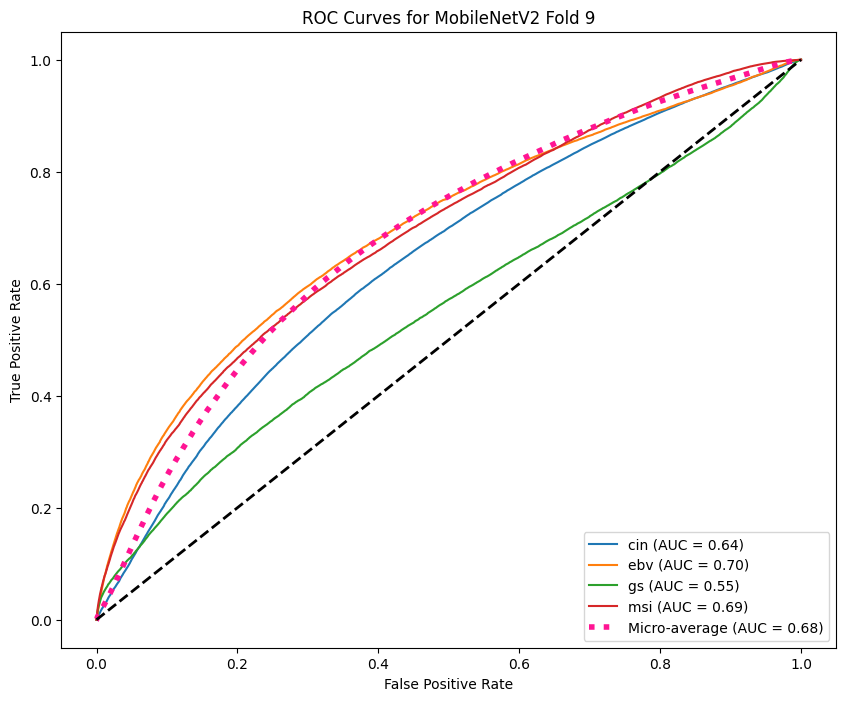

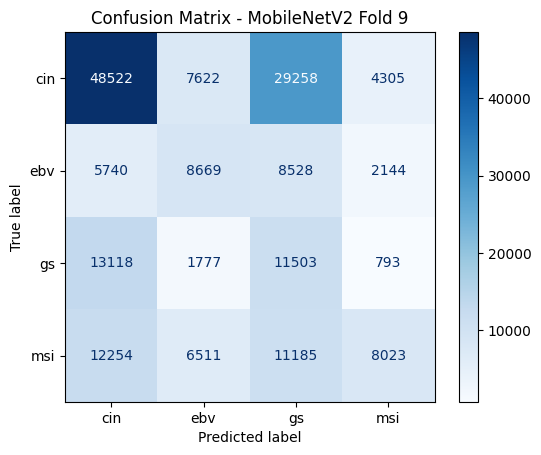

Classification Report MobileNetV2 Fold 9:

              precision    recall  f1-score   support

         cin       0.61      0.54      0.57     89707
         ebv       0.35      0.35      0.35     25081
          gs       0.19      0.42      0.26     27191
         msi       0.53      0.21      0.30     37973

    accuracy                           0.43    179952
   macro avg       0.42      0.38      0.37    179952
weighted avg       0.49      0.43      0.44    179952


Micro-average AUC: 0.68


In [50]:
evaluate_fold(fr'C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\notebooks\summary_results_mobnet\0707-213643_MobileNetV2_fold{fold_available}_results.csv', fold=fold_available)